Las matrices del problema son:
[4. 2. 3.]   [ x0 ]   [ 8.0 ]
[ 3. -5.  2.]   [ x1 ] = [ -14.0 ]
[-2.  3.  8.]   [ x2 ]   [ 27.0 ]
 

###### METODO DE JACOBI ######
Los valores obtenidos, con un error aparente:   6.74054333984163e-06 < 1e-05 ,  fueron:

[-0.9999846437721662, 3.000002372548024, 2.000009737969384]

Este resultado fue alcanzado con  61  iteraciones


###### METODO DE GAUSS-SEIDEL ######
Los valores obtenidos, con un error aparente:   5.620655875365208e-06 < 1e-05 (epsilon dado),  fueron:

[-0.9999986879098, 3.000000702152568, 2.000000064715337]

Este resultado fue alcanzado con  13  iteraciones


###### METODO SOR ######
Para w= 0.5
Los valores obtenidos, con un error aparente:   4.723224866732558e-06 < 1e-05 (epsilon dado),  fueron:

[-0.9999920626418239, 3.0000023332008197, 2.0000032212333845]

Este resultado fue alcanzado con  21  iteraciones



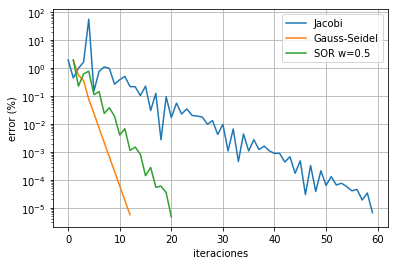

In [9]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

### METODO DE JACOBI ###
def imprimir_problema(M,N):
    lineas = len(M)
    #creando matriz de variables
    X=[]
    linea_igual = lineas % 2
    if linea_igual != 0 :
        linea_igual = 0.5 + lineas/2
    for k in range(lineas):
        p= "x"+str(k)
        X.append(p)
    for i in range (lineas):
        if i == (linea_igual-1):
            print(M[i]," ","[",X[i],"]","=","[",N[i],"]")
        else : 
            print(M[i]," ","[",X[i],"]"," ","[",N[i],"]") 
    return " "

#Sea la matriz del problema

A=array([(4.0,2.0,3.0),
         (3.0,-5.0,2.0),
         (-2.0,3.0,8.0)])
         
B=array([8.0,-14.0,27.0])

def e_ap(xup,xlow):                  #funcion para el error aparente
    return abs((xup-xlow)/xlow)
    

def met_jacobi(M,N):
    #dividimos la matriz principal en matrices D, L y U
    limite = len(M)
    dim_M = M.shape
    #inicializamos las matrices
    D = zeros(limite) #la hacemos un solo vector con los valores de diagonal
    L = zeros(dim_M) #con tamaño dim_M=(rangoM,rangoM) por ser M cuadrada
    U = zeros(dim_M) 
    
    #Lista de errores
    err_jacobi=[]
    
    #llenamos las matrices
    
    #para la matriz D
    for i in range(limite):
        D[i] = M[i][i]
    #print(D) 
    
    #para la matriz U
    for i in range(limite):
        for j in range (i+1,limite):
            U[i][j] = M[i][j]
    #print(U) 
    
    #para la matriz L
    for i in range(limite):
        for j in range (i+1,limite):
            L[j][i] = M[j][i]
    #print(L) 
      
    SUM= L + U
    #print(SUM)
    
    X=[] #array para almacenar los valores de (x, y, z)
        
    #la 1era iteracion es especial pues debemos comenzar con un "guess value"
    #generalizamos para n  e igualamos a 0. En este ejercicio: (x0,y0,z0) = (0,0,0)
    
    for j in range(limite):
        x = N[j]/D[j]
        X.append(x)
    i=len(X)  
        
    #por lo anterior, esta parte siempre emperazará desde la 2da iteración
    epsilon =  0.00001
    err_it = 1
    iteracion=1 #pues ya se hizo la primera iteracion igualando a 0
    
    while err_it > epsilon :
        for k in range (limite):
            y = (N - dot(SUM,X[0:i]))/ D
            
        #buscamos el error, analizamos solo para el valor de x
        err_it= e_ap(y[0],X[0])
#         err_it2= inner(y[0],X[0])
#         plt.plot(err_it2)
        err_jacobi.append(err_it)
        
        X=[] #vaciamos X y luego le agregamos los nuevos valores de y para la nueva iteracion
        #ingresamos los valores de y a la lista X
        for j in range (limite):
            X.append(y[j])
        y=[] #vaciamos y    
        iteracion += 1  
        #print(X,"__",iteracion,err_it)  #decomentar para ver la evolucion según se varía epsilon
    
    print("Los valores obtenidos, con un error aparente:  ",err_it,"<",epsilon,",  fueron:")
    print("")
    print(X)
    print("")
    print("Este resultado fue alcanzado con ",iteracion," iteraciones")
    plt.plot(err_jacobi, label = "Jacobi")
    return("")

###METODO de GAUS-SEIDEL###
def met_GS(M,N):
    #dividimos la matriz principal en matrices D, L y U
    limite = len(M)
    dim_M = M.shape
    #inicializamos las matrices
    D = zeros(limite) #la hacemos un solo vector con los valores de diagonal
    L = zeros(dim_M) 
    U = zeros(dim_M) 
    
    #Lista de errores
    err_GS=[]
    
    #llenamos las matrices
    
    #para la matriz D
    for i in range(limite):
        D[i] = M[i][i]
    #print(D) 
    
    #para la matriz U
    for i in range(limite):
        for j in range (i+1,limite):
            U[i][j] = M[i][j]
    #print(U) 
    
    #Ahora L será lower + diagonal
    L = M - U
        
    X=[] #array para almacenar los valores de (x, y, z)
        
    #la 1era iteracion es especial pues debemos comenzar con un "guess value"
    #generalizamos para n=(limite). Para este este ejercicio: (x0,y0,z0) = (0,0,0)
    
    for j in range(limite):
        x = 0
        X.append(x)
    i=len(X) 
        
    #por lo anterior, esta parte siempre emperazará desde la 2da iteración
    epsilon =  0.00001
    err_it = 1 #inicializamos para que pueda ingresar al while
    iteracion=1 #pues ya se hizo la primera iteracion igualando a 0
    
    while err_it > epsilon :
        for k in range (limite):
            y= dot(linalg.inv(L), N - dot(U, X[0:i]))
            
        #buscamos el error, analizamos solo para el valor de x
        err_it= e_ap(y[0],X[0])
#         err_it2= inner(y[0],X[0])
#         plt.plot(err_it2)
        err_GS.append(err_it)
        
        
        X=[] #vaciamos X y luego le agregamos los nuevos valores de y para la nueva iteracion
        #ingresamos los valores de y a la lista X
        for j in range (limite):
            X.append(y[j])
        #print(y,X,iteracion,err_it) #decomentar para ver la evolucion según se varía epsilon          
        y=[] #vaciamos y    
        iteracion += 1  
   
    print("Los valores obtenidos, con un error aparente:  ",err_it,"<",epsilon,"(epsilon dado),  fueron:")
    print("")
    print(X)
    print("")
    print("Este resultado fue alcanzado con ",iteracion-1," iteraciones")
    plt.plot(err_GS, label = "Gauss-Seidel")
    return("")


##METODO SOR###
#Para SOR usamos el mismo código de G-S pero con modificaciones para poder añadir w

def met_SOR(M,N,omega):
    
    limite = len(M)
    dim_M = M.shape
   
    D = zeros(dim_M) 
    L = zeros(dim_M) 
    U = zeros(dim_M) 
    
    err_SOR=[]
    
    #para la matriz D
    for i in range(limite):
        D[i][i] = M[i][i]
    
    #para la matriz U
    for i in range(limite):
        for j in range (i+1,limite):
            U[i][j] = M[i][j]
    #print(U) 
    
    #para la matriz L
    for i in range(limite):
        for j in range (i+1,limite):
            L[j][i] = M[j][i]
    #print(L) 
    
    #Ahora L será lower + diagonal
    Lx = D + omega*L
    
    X=[] #array para almacenar los valores de (x, y, z)
        
    #la 1era iteracion es especial pues debemos comenzar con un "guess value"
    #generalizamos para n pero en este ejercicio haremos (x0,y0,z0) = (0,0,0)
    
    for j in range(limite):
        x = 0
        X.append(x)
    i=len(X) 
        
    #por lo anterior, esta parte siempre emperazará desde la 2da iteración
    epsilon =  0.00001
    err_it = 1
    iteracion=1
    
    while err_it > epsilon :
        for k in range (limite):
            y= dot(linalg.inv(Lx), N - dot((1-omega)*L+U, X[0:i]))
            
        #buscamos el error, analizamos solo para el valor de x
        err_it= e_ap(y[0],X[0])
#         err_it2= inner(y[0],X[0])
#         plt.plot(err_it2)
        err_SOR.append(err_it)
        
        
        X=[] #vaciamos X y luego le agregamos los nuevos valores de y para la nueva iteracion
        #ingresamos los valores de y a la lista X
        for j in range (limite):
            X.append(y[j])
        #print(y,X,iteracion,err_it) #decomentar para ver la evolucion según se varía epsilon          
        y=[] #vaciamos y    
        iteracion += 1 
        
        
        
    print("Para w=",omega)
    print("Los valores obtenidos, con un error aparente:  ",err_it,"<",epsilon,"(epsilon dado),  fueron:")
    print("")
    print(X)
    print("")
    print("Este resultado fue alcanzado con ",iteracion-1," iteraciones")
    plt.plot(err_SOR, label = "SOR w="+str(omega))
    return("")


print("Las matrices del problema son:")
print(imprimir_problema(A,B))
print("")
print("###### METODO DE JACOBI ######")
print(met_jacobi(A,B))  
print("")
print("###### METODO DE GAUSS-SEIDEL ######")
print(met_GS(A,B))
print("")
print("###### METODO SOR ######")
w=0.5 
print(met_SOR(A,B,w))
#se comprueba que si w=1 -->se genera el mismo resultado que G-S, debería generar la misma gráfica
#print(met_SOR(A,B,1)) #decomentar para observar la superposicion de gráfica


plt.yscale('log')
plt.legend()
plt.grid()
plt.ylabel('error (%)')
plt.xlabel('iteraciones')
plt.show()




########################
METODOS DE OPTIMIZACIÓN
########################
Usamos la siguientes matrices para poder mostrar los métodos de optimización
[ 2. -1.  0.]   [ x0 ]   [ 8.0 ]
[-1.  2. -1.]   [ x1 ] = [ -14.0 ]
[ 0. -1.  2.]   [ x2 ]   [ 27.0 ]
 
Siendo la matriz principal SPD

Mostramos los resultado hallados con el método de gauss-seidel

###### METODO DE GAUSS-SEIDEL ######
Los valores obtenidos, con un error aparente:   5.639181297024967e-06 < 1e-05 (epsilon dado),  fueron:

[5.749967575073242, 3.499967575073242, 15.249983787536621]

Este resultado fue alcanzado con  19  iteraciones


Comparamos con los resultados obtenidos para máximo descenso

###### METODO DE MAXIMO DESCENSO ######
Los valores obtenidos, con un error aparente:   5.647781973542085e-06 < 1e-05 (epsilon dado),  fueron:

[ 5.74920876  3.49924104 15.24920876]

Este resultado fue alcanzado con  26  iteraciones

###### METODO DE GRADIENTE CONJUGADO ######
Los valores obtenidos, con un error aparente:   7.767727

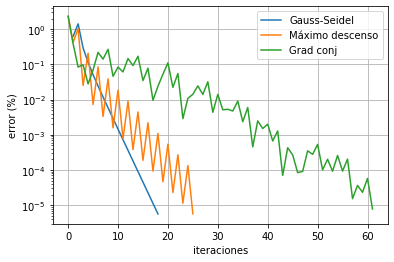

Se observa una cierta divergencia en los errores para estos últimos métodos
FIN


In [10]:

print("########################")
print("METODOS DE OPTIMIZACIÓN")
print("########################")
## METODOS DE OPTIMIZACION

### METODO MAXIMO DESCENSO


K=array([(2.0,-1.0,0),
         (-1.0,2.0,-1.0),
         (0.0,-1.0,2.0)])
    
B=array([8.0,-14.0,27.0])

#método encontrado en internet que verifica si la matriz, solo usa la biblioteca numpy 
#fuente: https://stackoverflow.com/questions/16266720/find-out-if-matrix-is-positive-definite-with-numpy

def is_pos_def(M):
    if array_equal(M, M.T):
        try:
            linalg.cholesky(M) #como se vio, solo matrices del tipo SPD cumplen cholesky
            return True
        except linalg.LinAlgError:
            return False
    else:
        return False

#print(is_pos_def(K)) #output para K : True

def max_des(M,N):
    lim = len (M)
    X=zeros(lim)
    for k in range(lim):
        X[k] = 1            #cambiar si se desea un "initial_guess" diferente
   
    err_it=1
    err_grad=[]
    epsilon= 0.00001
    iteracion=1 #contando el initial guess
    
    while err_it > epsilon:
        
        r= N - dot(M,X)
        
        alfa = dot(r.T,r)/dot(r.T,dot(M,r))
        
        Xnew = X + alfa*r
        
        err_it=e_ap(Xnew[0],X[0])
        err_grad.append(err_it)
        
        X=Xnew
        iteracion += 1 
        
    print("Los valores obtenidos, con un error aparente:  ",err_it,"<",epsilon,"(epsilon dado),  fueron:")
    print("")
    print(Xnew)
    print("")
    print("Este resultado fue alcanzado con ",iteracion-1," iteraciones")
    plt.plot(err_grad, label = "Máximo descenso")
    return("")
    
def grad_conj(M,N):
    lim = len (M)
    X=zeros(lim)
    for k in range(lim):
        X[k] = 1            #cambiar si se desea un "initial_guess" diferente
   
    err_it=1
    err_conj=[]
    epsilon= 0.00001
    iteracion=1 #contando el initial guess
    
    r = N - dot(M,X) #inicio r
    
    beta = dot(r.T,r)
    
    d = r
    
    while err_it > epsilon:
        
        z = dot(M,d)
        
        alfa = beta/dot(d.T,z)
        
        Xnew = X + alfa*d
        
        r = r -alfa*z
        
        y=beta
        
        beta=dot(r.T,r)
        
        alfa = -beta/y
        
        d = -r + alfa*d
                
        err_it=e_ap(Xnew[0],X[0]) #por conveniencia, solo analizamos el error en x
        err_conj.append(err_it)
#         err_it2= inner(y[0],X[0])
#         plt.plot(err_it2, label = "inner Grad conj")

        X=Xnew
        
        iteracion += 1 
        
    print("Los valores obtenidos, con un error aparente:  ",err_it,"<",epsilon,"(epsilon dado),  fueron:")
    print("")
    print(Xnew)
    print("")
    print("Este resultado fue alcanzado con ",iteracion-1," iteraciones")
    plt.plot(err_conj, label = "Grad conj")
    return("")
    
    
print("Usamos la siguientes matrices para poder mostrar los métodos de optimización")
print(imprimir_problema(K,B))
print("Siendo la matriz principal SPD") #simétrica positiva definida
print("")
print("Mostramos los resultado hallados con el método de gauss-seidel")#para poder comparar con los nuevos resultados
print("")
print("###### METODO DE GAUSS-SEIDEL ######")
print(met_GS(K,B))
print("")
print("Comparamos con los resultados obtenidos para máximo descenso")
print("")
print("###### METODO DE MAXIMO DESCENSO ######")
print(max_des(K,B)) 
print("###### METODO DE GRADIENTE CONJUGADO ######")
print(grad_conj(K,B)) 


plt.yscale('log')
plt.legend()
plt.grid()
plt.ylabel('error (%)')
plt.xlabel('iteraciones')
plt.show()

print("Se observa una cierta divergencia en los errores para estos últimos métodos")
print("FIN")